In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Contents List: 

### 1.) Crosstab
### 2.) Addressing PII
### 3.) Region Column
### 4.) Exclusion flag and creating High Activity Customers dataframe
### 5.) Profiling variables notes
    A.) Looking at Categorical and Numerical Data in High Activity Customers dataframe
        i.) Dealing with Strangely High Prices
    B.) Generation Flag
    C.) First Look at Data Trends in High Activity Customers
    D.) Profile Column Using .loc
    E.) Finding Data Trends Using Profile Column
### 6.) Adding Department Names column

#### Making a path variable and importing Data set

In [3]:
#First path: for my computer
#path = r'C:\Users\Treeb\Instacart Basket Analysis 11-20-2023\Instacart Basket Analysis 11-20-2023'
#Second path: Mentor computer
path = r'C:\Users\Treeb\Instacart Basket Analysis 11-20-2023'

In [3]:
df_opc_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
df_opc_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_users_last_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,Marital_Status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_opc_merge.shape

(32404859, 33)

# 1.) Crosstab

In [ ]:
crosstab = pd.crosstab(df_opc_merge['days_since_users_last_order'], df_opc_merge['order_number'], dropna = False)

In [ ]:
crosstab.to_clipboard()

In [ ]:
df_opc_merge.columns

In [ ]:
df_opc_merge.shape

# 2.) Addressing PII

### PII (Personally Identifiable Information)

In [ ]:
df_opc_merge.head()

Columns that contain PII: 
1.) First Name
2.) Last Name
3.) Gender
4.) State
5.) Age
6.) number_of_dependants
7.) Marital_Status
8.) income

To address this PII, I will have to check in with my company to see what their procedure for this is. PII is very susceptible to hackers, who might use such information for identity theft, or might sell their information (such as emails) to third parties that could use that information for anything from spam mail to something much more nefarious. There are several things companies have to do with PII in order to comply with consumer privacy laws, such as the General Data Protection Regulations (GDPR) and the California Consumer Privacy Act. The Federal Trade Commission (FTC) has a five-step plan for securing PII: 
1.) Keep track of where PII is stored and used in your company. 
2.) Only keep PII you need for your business and only as long as you need it. 
3.) Secure your PII under physical or digital lock and key. 
4.) Properly dispose of PII you don't need anymore. Make sure all employees follow the same procedures. 
5.) Have a plan in case there is a security breach. 

# 3.) Region Column

### Region Column

In [9]:
df_opc_merge['State'].unique()

array(['Alabama', 'Indiana', 'Louisiana', 'Montana', 'Oklahoma',
       'Tennessee', 'Iowa', 'Ohio', 'Virginia', 'Connecticut', 'Kentucky',
       'Oregon', 'South Dakota', 'Michigan', 'New Jersey', 'Arizona',
       'Maine', 'Hawaii', 'Minnesota', 'Illinois', 'Idaho', 'Kansas',
       'North Carolina', 'Vermont', 'Alaska', 'Delaware', 'Maryland',
       'Nebraska', 'Nevada', 'Arkansas', 'Georgia',
       'District of Columbia', 'Utah', 'Colorado', 'Florida',
       'South Carolina', 'Rhode Island', 'Washington', 'California',
       'Mississippi', 'Texas', 'New Mexico', 'Missouri', 'Wyoming',
       'New Hampshire', 'Massachusetts', 'Pennsylvania', 'Wisconsin',
       'West Virginia', 'North Dakota', 'New York'], dtype=object)

In [6]:
df_opc_merge['State'].unique().shape

(51,)

This shows us that there are 51 columns in states (50 states plus District of Columbia). All the state names follow the same format and are not misspelled. 

Next, I will put states into divisions, then regions to keep them organized. 

In [4]:
Division_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']
Division_2 = ['New York', 'Pennsylvania', 'New Jersey']
Division_3 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio']
Division_4 = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
Division_5 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']
Division_6 = ['Kentucky', 'Tennessee', 'Mississippi', 'Alabama']
Division_7 = ['Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
Division_8 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']
Division_9 = ['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


Len function to double check that all 51 states are accounted for.

In [7]:
len(Division_1) + len(Division_2) + len(Division_3) + len(Division_4) + len(Division_5) + len(Division_6) + len(Division_7) + len(Division_8) + len(Division_9)

51

The following function is to put the correct regions in a list, depending on the division each state is in. 

In [5]:
result = []

for state in df_opc_merge["State"]:
  if state in Division_1:
    result.append("Region 1")
  elif state in Division_2:
    result.append("Region 1")
  elif state in Division_3:
    result.append("Region 2")
  elif state in Division_4:
    result.append("Region 2")  
  elif state in Division_5:
    result.append("Region 3")
  elif state in Division_6:
    result.append("Region 3")
  elif state in Division_7:
    result.append("Region 3")  
  elif state in Division_8:
    result.append("Region 4")
  elif state in Division_9:
    result.append("Region 4")  
  else:
    result.append("Unknown")

In [ ]:
result

Now, I'm adding the list of regions (called "result") onto the original table as a new column called "Region". 

In [6]:
df_opc_merge['Region'] = result

In [11]:
df_opc_merge['Region'].value_counts(dropna = False)

Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: Region, dtype: int64

In [ ]:
df_opc_merge['State'].value_counts(dropna = False)

In [ ]:
df_opc_merge.shape

#### Is there a difference in spending habits between the different US regions? 

<AxesSubplot:title={'center':'Number of Customers Per Region'}>

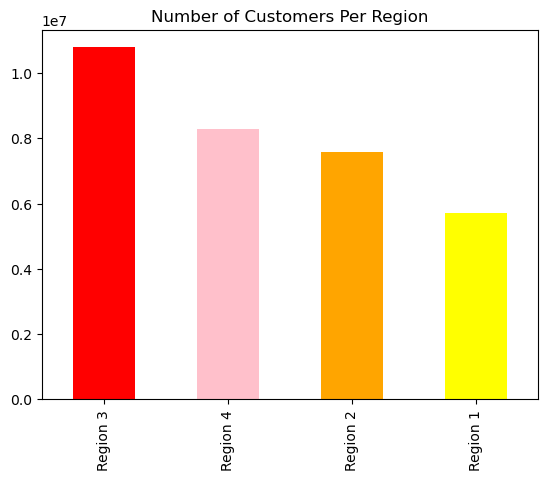

In [23]:
df_opc_merge['Region'].value_counts().plot.bar(color = ['red', 'pink', 'orange', 'yellow'], title='Number of Customers Per Region')

The graph above shows the total number of instacart customers in each region. Region 3 has the most and Region 1 the least. 

<AxesSubplot:xlabel='Region', ylabel='Count'>

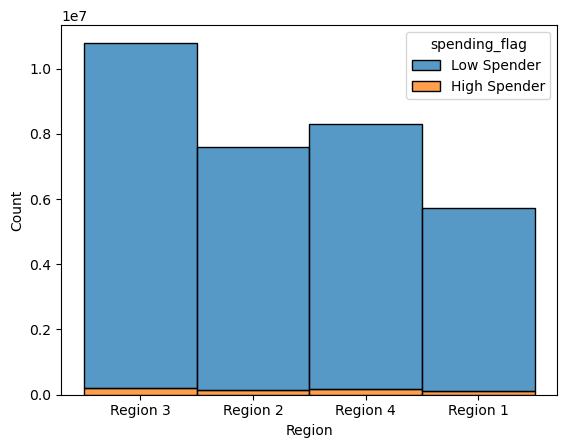

In [21]:
sns.histplot(data=df_opc_merge,x='Region',hue='spending_flag',multiple='stack', binwidth=1)

The graph above shows the number of high and low spenders in each region. High spenders spend more than $10 per purchase on average, while low spenders spend less than that per product on average. Regions 3 and 4 have the most high spenders.

<AxesSubplot:xlabel='loyalty_flag', ylabel='Count'>

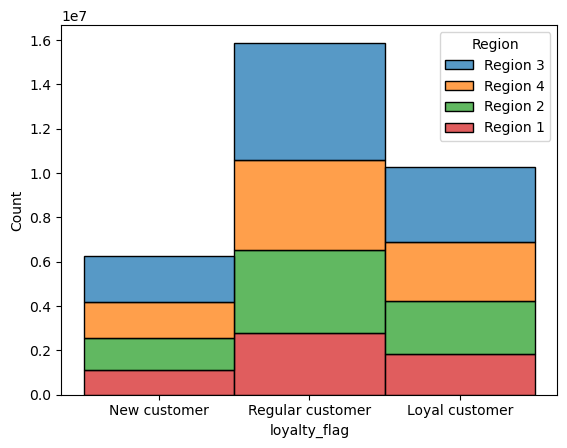

In [15]:
sns.histplot(
    data=df_opc_merge,
    x='loyalty_flag',
    hue_order=['Region 3', 'Region 4', 'Region 2', 'Region 1'],
    hue='Region', 
    multiple='stack')

<AxesSubplot:xlabel='loyalty_flag', ylabel='Count'>

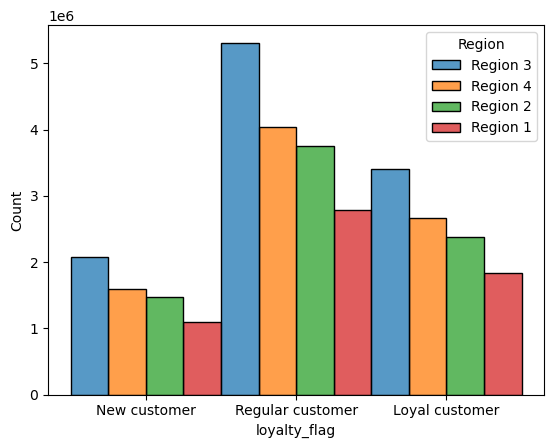

In [17]:
sns.histplot(
    data=df_opc_merge,
    x='loyalty_flag',
    hue_order=['Region 3', 'Region 4', 'Region 2', 'Region 1'],
    hue='Region',
    multiple='dodge')

The graph above shows the loyalty per region. New Customers have used instacart ten times or less, Regular Customers 10 to 40 times, and Loyal Customers greater than 40 times. It's difficult to see any big patterns just by eyeballing this. 

<AxesSubplot:xlabel='Region', ylabel='count'>

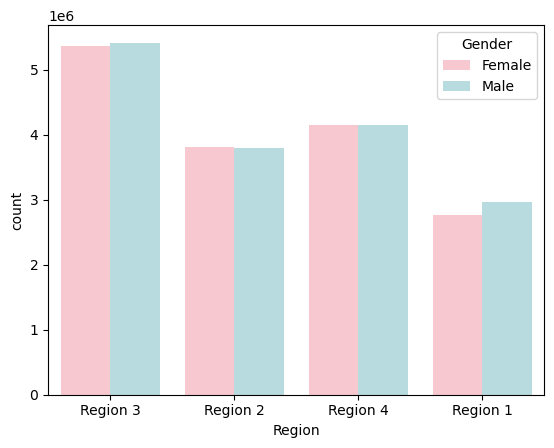

In [13]:
sns.countplot(data=df_opc_merge,x='Region',hue='Gender', palette=["#FFC0CB", "#B0E0E6"])

The different genders of the customers in different regions. Regions 1 and 3 have a little more males, regions 2 and 4 are even. 

In [3]:
df_opc_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_region_merged.pkl'))

In [4]:
df_opc_merge.shape

(32404859, 34)

In [4]:
df_opc_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_users_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_purchase_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependants', 'Marital_Status', 'income',
       'Region'],
      dtype='object')

In [15]:
#avg_price_by_region = df_opc_merge.groupby('Region').agg({'prices': ['mean']})
avg_price_by_region = df_high_activity_customers.groupby('Region').agg({'prices': ['mean']})


In [16]:
avg_price_by_region

,prices
,mean
Region,
Region 1,7.781441
Region 2,7.792318
Region 3,7.794439
Region 4,7.790308


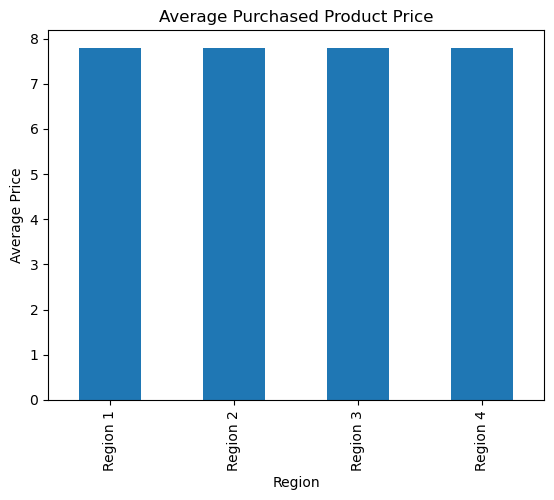

In [17]:
avg_price_by_region_bar = avg_price_by_region.plot(kind='bar', title='Average Purchased Product Price', ylabel='Average Price', xlabel='Region', legend=False)

In [16]:
avg_price_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'avg_price_by_region_bar.png'))

In [12]:
avg_price_by_region_2 = df_high_activity_customers.groupby('Region').agg({'prices': ['mean']})

In [14]:
avg_price_by_region_2

,prices
,mean
Region,
Region 1,11.542582
Region 2,12.681835
Region 3,12.118845
Region 4,11.276491


The table above shows the average amount each region spends on each product. From here, we see Region 2 spends the most per product on average.

***This table shows the original values of prices per region before over 4000 suspiciously high data points were turned to NULL. 

In [25]:
genders_by_region = df_high_activity_customers.groupby(['Region', 'Gender']).agg({'Gender': ['count']})

<AxesSubplot:xlabel='Region', ylabel='count'>

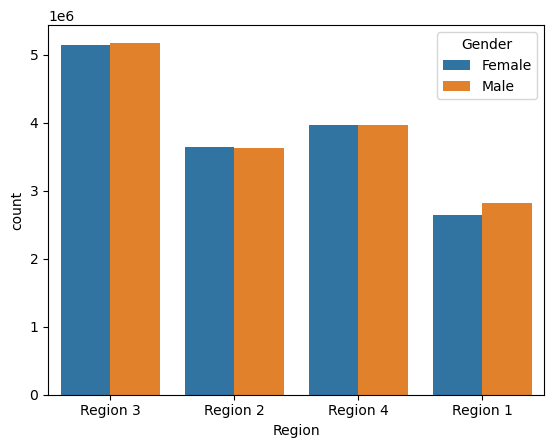

In [34]:
#genders_by_region_active_bar = genders_by_region.plot(kind='bar', title='Genders by Region', ylabel='Number of people', xlabel='Region', stacked=True, color=['pink', 'blue'])
#(df.groupby(['sex','category'])
#   .count().unstack('sex').plot.bar())
#genders_by_region_active_bar = (genders_by_region.groupby(['Region', 'Gender']).count()unstack('Gender').plot.bar())
sns.countplot(data=df_high_activity_customers,x='Region',hue='Gender')

In [6]:
#females_by_region = df_high_activity_customers.groupby('Region').agg({'Gender': ['count']})

### Gender by regions graph in gender colors

In [4]:
df_high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [4]:
df_high_activity_customers.shape

(30964564, 35)

<AxesSubplot:xlabel='Region', ylabel='count'>

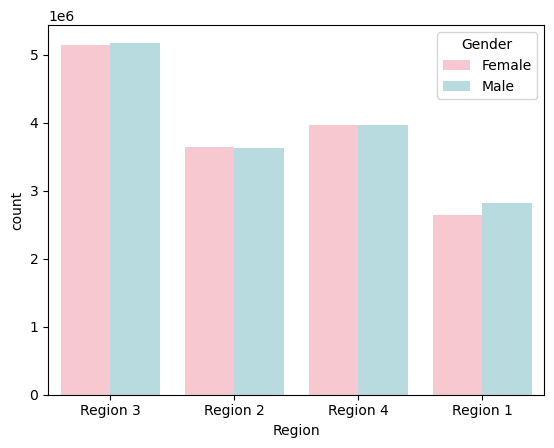

In [4]:
sns.countplot(data=df_high_activity_customers,x='Region',hue='Gender', palette=["#FFC0CB", "#B0E0E6"])

### Export Dataframe with new Region column as pickle

In [ ]:
df_opc_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_region_merged.pkl'))

### Import Data merged with Region data

In [3]:
df_opc_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_region_merged.pkl'))

# 4.) Exclusion Flag

### Exclusion Flag

In [18]:
df_opc_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_users_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_purchase_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependants', 'Marital_Status', 'income',
       'Region'],
      dtype='object')

In [4]:
df_opc_merge.shape

(32404859, 33)

We want to exclude people that have less than 5 orders. We can find this using the "max_order" column. 

In [5]:
exclude = []

for orders in df_opc_merge['max_order']:
    if orders < 5: 
        exclude.append(True)
    else: 
        exclude.append(False)

In [6]:
df_opc_merge['exclusion_flag'] = exclude

In [23]:
#df_low_activity_customers = df_opc_merge[df_opc_merge['exclusion_flag'] == True]

In [17]:
df_low_activity_customers.shape

(1440295, 35)

In [7]:
df_high_activity_customers = df_opc_merge[df_opc_merge['exclusion_flag'] == False]

In [8]:
df_high_activity_customers.shape

(30964564, 34)

In [20]:
df_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [9]:
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers_no_region.pkl'))

# 5.) Profiling Variables

### Profiling variables
#### A.) Looking at Categorical and Numerical Data in High Activity Customers dataframe
##### i.) Dealing with Strangely High Prices
#### B.) Generation Flag
#### C.) First Look at Data Trends in High Activity Customers
#### D.) Profile Column Using .loc
#### E.) Finding Data Trends Using Profile Column

In [5]:
df_high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers_2.pkl'))

In [14]:
df_high_activity_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_users_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_purchase_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependants', 'Marital_Status', 'income',
       'Region', 'exclusion_flag'],
      dtype='object')

Directions: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Profile labels:
Young parent: age < 40, num of deps > 0, marital status = married, department_id = 18
Single adult high income female: num of deps = 0, age > 20, marital status = single, gender = female, income > 100,000
Single adult low income female: num of deps = 0, age > 20, marital status = single, gender = female, income < 100,000
Single adult high income male: num of deps = 0, age > 20, marital status = single, gender = male, income > 100,000
Single adult low income male: num of deps = 0, age > 20, marital status = single, gender = male, income < 100,000
Old high income Parent/Grandparent: age > 50, num of deps > 0, income > 100,000, department_id = 18
Old low income Parent/Grandparent: age > 50, num of deps > 0, income < 100,000, department_id = 18
Independent high income Elderly: age > 70, num of deps = 0, income > 100,000
Independent low income Elderly: age > 70, num of deps = 0, income < 100,000
w/sahm/d: num of deps > 0, order hour of day > 8 am < 4 PM
high income parent: income > 100,000, num of deps > 0
low income parent: income < 100,000, num of deps > 0

### A.) Looking at Numerical and Categorical Variables in High Activity Customers data

In [15]:
df_high_activity_customers['Marital_Status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

In [16]:
df_high_activity_customers['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [27]:
df_high_activity_customers['income'].min()

25903

In [28]:
df_high_activity_customers['income'].max()

593901

In [29]:
df_high_activity_customers['income'].median()

96765.0

In [31]:
df_high_activity_customers['income'].mean()

99675.86510754681

High activity customers (customers that have shopped at least five times) earn between 26,000 usd and 600,000 usd income. On average, customers make about 100,000 usd income.  

### i.) Dealing with strangely high prices

In the next section, there is something strange about the prices. It should've been taken care of earlier, but better late than never. :)

In [62]:
df_high_activity_customers['prices'].max()
#df_high_activity_customers['prices'].mean()

99999.0

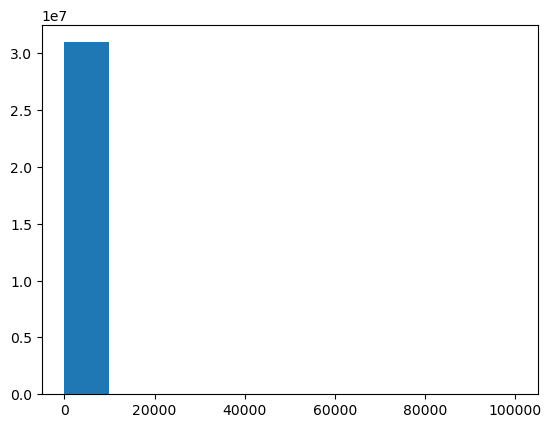

In [61]:
plt.hist(df_high_activity_customers['prices'])
plt.show()

In [7]:
df_high_activity_customers['prices'].describe()

count    3.096456e+07
mean     1.193352e+01
std      4.913444e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

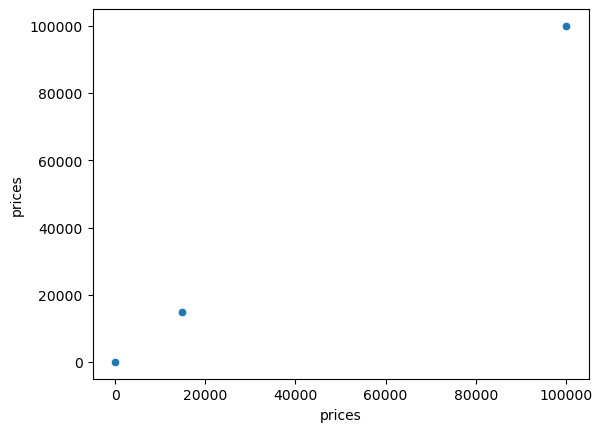

In [9]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_high_activity_customers)

This scatterplot shows two very big groups of outliers. 

In [8]:
df_high_activity_customers.loc[df_high_activity_customers['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_users_last_order,product_id,add_to_cart_order,reordered,_merge,...,Last Name,Gender,State,Age,date_joined,number_of_dependants,Marital_Status,income,Region,exclusion_flag
7805,1435153,1519,26,2,11,6.0,21553,15,0,both,...,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Region 1,False
7806,1066435,1519,32,3,10,5.0,21553,28,1,both,...,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Region 1,False
15143,1697208,2409,33,1,19,5.0,21553,1,0,both,...,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,Region 4,False
20264,965345,3531,27,2,19,8.0,33664,2,0,both,...,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,Region 4,False
20497,2943740,3793,1,2,9,NaN,21553,3,0,both,...,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,Region 3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303797,3138833,51346,1,6,4,NaN,33664,1,0,both,...,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,Region 1,False
32303798,1275440,51346,3,2,7,11.0,33664,5,1,both,...,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,Region 1,False
32303799,3265389,51346,4,1,17,13.0,33664,2,1,both,...,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,Region 1,False
32307882,1179092,131671,12,4,9,15.0,33664,1,0,both,...,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,Region 1,False


4877 orders have prices over 100 usd, with a maximum of 99,999 usd! As a supermarket likely won't be selling anything that expensive, we need to take that out for now and check the data before using it in an analysis.  

The following command will assign all the prices over 100 usd as a missing value.  

In [10]:
df_high_activity_customers.loc[df_high_activity_customers['prices'] >100, 'prices'] = np.nan

In [12]:
df_high_activity_customers['prices'].max()

25.0

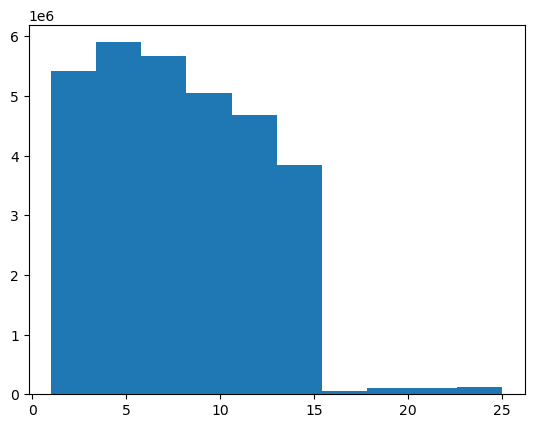

In [13]:
plt.hist(df_high_activity_customers['prices'])
plt.show()

### B.) Generation Flag

In [32]:
df_high_activity_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_users_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_purchase_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependants', 'Marital_Status', 'income',
       'Region', 'exclusion_flag', 'profile'],
      dtype='object')

In [33]:
generation = []

for age in df_high_activity_customers['Age']:
    if age < 11:
        generation.append("Gen Alpha")
    elif age < 28 and age > 10:
        generation.append("Gen Z")
    elif age < 44 and age > 27:
        generation.append("Millennial")
    elif age < 59 and age > 43:
        generation.append("Gen X")
    elif age < 78 and age > 58:
        generation.append("Baby Boomer")
    elif age < 98 and age > 77:
        generation.append("Silent Gen")
    elif age < 123 and age > 97:
        generation.append("Greatest Gen")
    else: 
        generation.append("Unknown")

In [7]:
df_high_activity_customers['Age'].dtype

dtype('int64')

In [34]:
df_high_activity_customers['generation_flag'] = generation

In [35]:
df_high_activity_customers.shape

(30964564, 37)

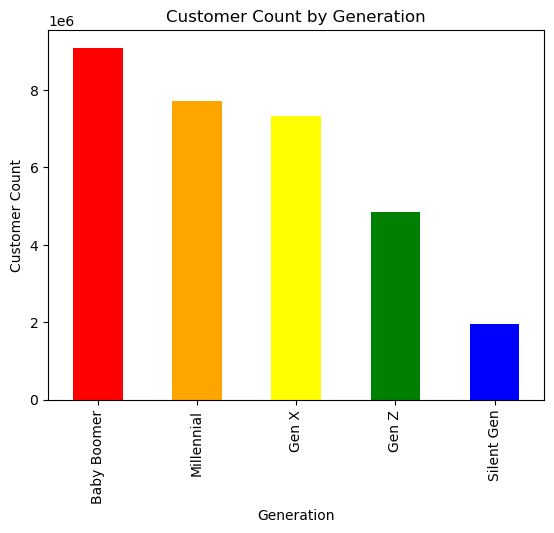

In [43]:
generation_bar = df_high_activity_customers['generation_flag'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'], xlabel='Generation', ylabel='Customer Count', title='Customer Count by Generation')

### C.) First Look at Data Trends in High Activity Customers

<AxesSubplot:xlabel='Region', ylabel='count'>

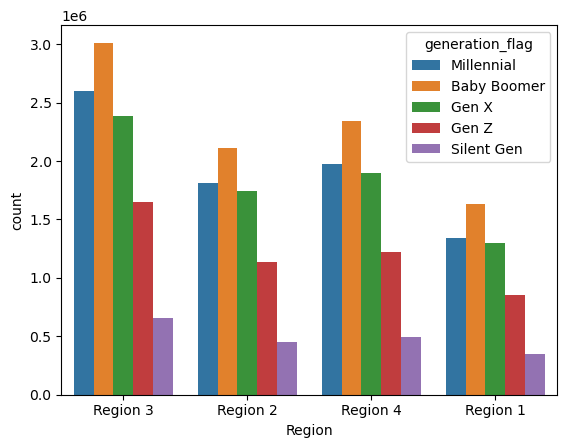

In [15]:
sns.countplot(data=df_high_activity_customers,x='Region',hue='generation_flag')

In [16]:
df_high_activity_customers['Marital_Status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='count'>

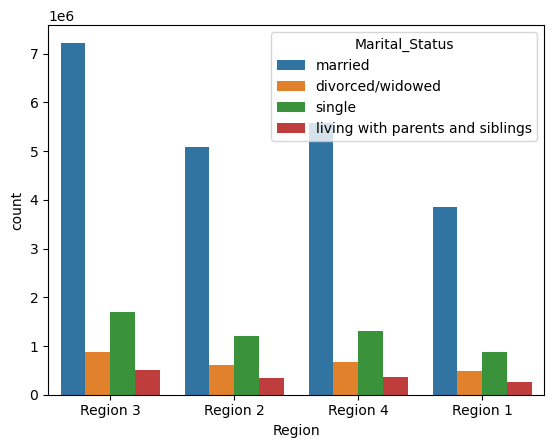

In [17]:
sns.countplot(data=df_high_activity_customers,x='Region',hue='Marital_Status')

In [ ]:
#marital_status = df_high_activity_customers.groupby('Region').agg({'prices': ['mean']})

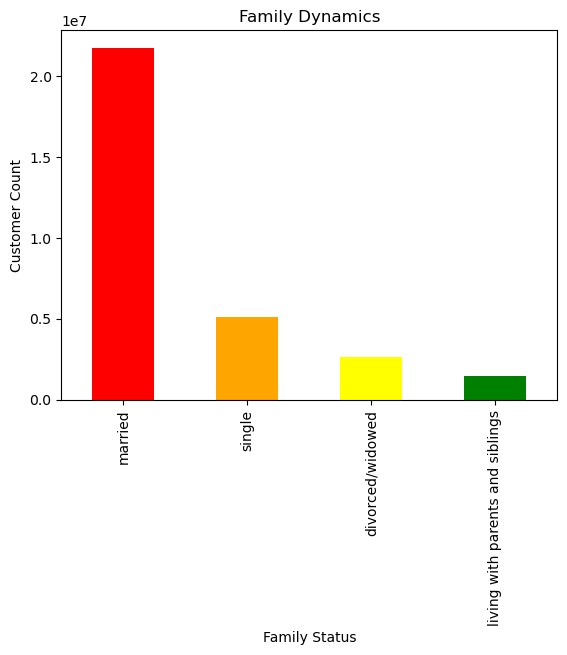

In [18]:
#marital_status_bar = marital_status.plot(kind='bar', title='Family Dynamics', ylabel='Number of Customers', xlabel='Family Status', legend=True)
marital_status_bar = df_high_activity_customers['Marital_Status'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green'], xlabel='Family Status', ylabel='Customer Count', title='Family Dynamics')

### D.) Profile Column Using .loc

young single adults: marrital status = single, num of deps = 0, age < 40
single adults: marrital status = single, num of deps = 0, age > 39
young parents: marrital status = married, num of deps > 0, age < 40
parents/grandparents: num of deps > 0, marrital status = married, age > 39
single parents/grandparents/caregivers: num of deps > 0, marital status = single
couple no children: marital status = married, num of deps = 0

In [22]:
# Young Single Adults
df_high_activity_customers.loc[(df_high_activity_customers["Age"] < 40) & (df_high_activity_customers["Marital_Status"] == 'single') & (df_high_activity_customers["number_of_dependants"] == 0), 'profile'] = 'Young Single Adult'

In [23]:
# Single Adults
df_high_activity_customers.loc[(df_high_activity_customers["Marital_Status"] == "single") & (df_high_activity_customers["number_of_dependants"] == 0) & (df_high_activity_customers["Age"] > 39), 'profile'] = 'Single Adult'

In [24]:
# Young Parents
df_high_activity_customers.loc[(df_high_activity_customers["Marital_Status"] == "married") & (df_high_activity_customers["number_of_dependants"] > 0) & (df_high_activity_customers["Age"] < 40), 'profile'] = 'Young Parents'

In [25]:
# Married No Children
df_high_activity_customers.loc[(df_high_activity_customers["Marital_Status"] == "married") & (df_high_activity_customers["number_of_dependants"] == 0), 'profile'] = 'Married No Children'

In [26]:
# Parents 40 - 55
df_high_activity_customers.loc[(df_high_activity_customers["Marital_Status"] == "married") & (df_high_activity_customers["number_of_dependants"] > 0) & (df_high_activity_customers["Age"] > 39) & (df_high_activity_customers["Age"] < 55), 'profile'] = 'Parents 40 - 55'

In [27]:
# Older Parents/Grandparents
df_high_activity_customers.loc[(df_high_activity_customers["Marital_Status"] == "married") & (df_high_activity_customers["number_of_dependants"] > 0) & (df_high_activity_customers["Age"] > 54), 'profile'] = 'Older Parents/Grandparents'

In [28]:
# Caregivers/single Parents
df_high_activity_customers.loc[(df_high_activity_customers["Marital_Status"] != "married") & (df_high_activity_customers["number_of_dependants"] > 0), 'profile'] = 'Caregivers/Single Parents'

In [29]:
df_high_activity_customers['profile'].value_counts(dropna = False)

Older Parents/Grandparents    9724309
Young Parents                 6523363
Parents 40 - 55               5496039
Young Single Adult            2660575
NaN                           2645271
Single Adult                  2433835
Caregivers/Single Parents     1481172
Name: profile, dtype: int64

In [16]:
df_high_activity_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_users_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_purchase_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependants', 'Marital_Status', 'income',
       'Region', 'exclusion_flag', 'profile'],
      dtype='object')

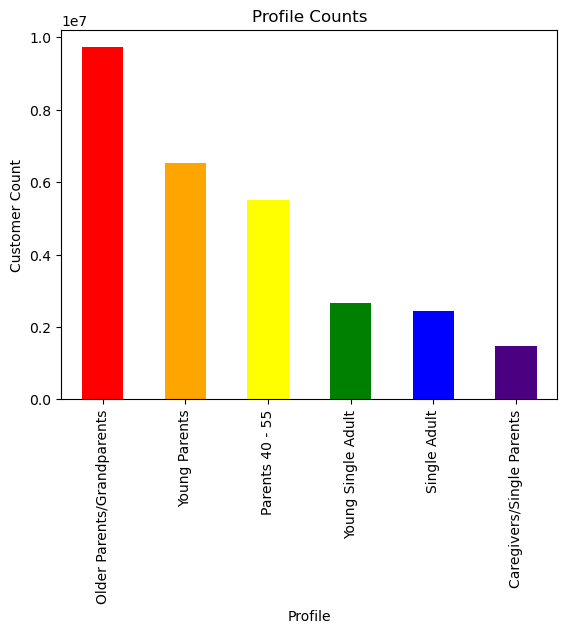

In [17]:
profile_bar = df_high_activity_customers['profile'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'], xlabel='Profile', ylabel='Customer Count', title='Profile Counts')

### E.) Finding Data Trends Using Profile Column

<AxesSubplot:xlabel='Region', ylabel='Count'>

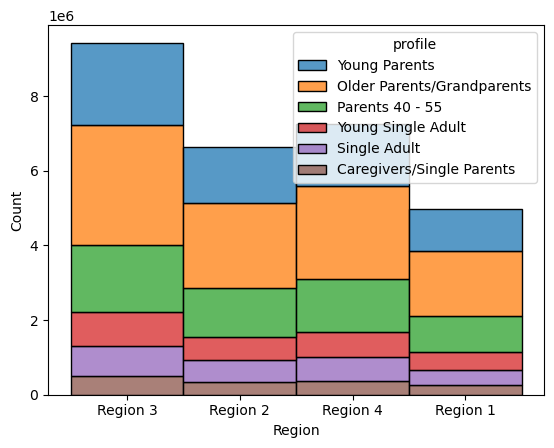

In [18]:
sns.histplot(
    data=df_high_activity_customers,
    x='Region',
    hue='profile', 
    multiple='stack')

In [19]:
avg_price_by_profile = df_high_activity_customers.groupby('profile').agg({'prices': ['mean']})

In [20]:
avg_price_by_profile

,prices
,mean
profile,
Caregivers/Single Parents,10.890167
Older Parents/Grandparents,12.016839
Parents 40 - 55,11.301402
Single Adult,12.928428
Young Parents,12.378119
Young Single Adult,11.913898


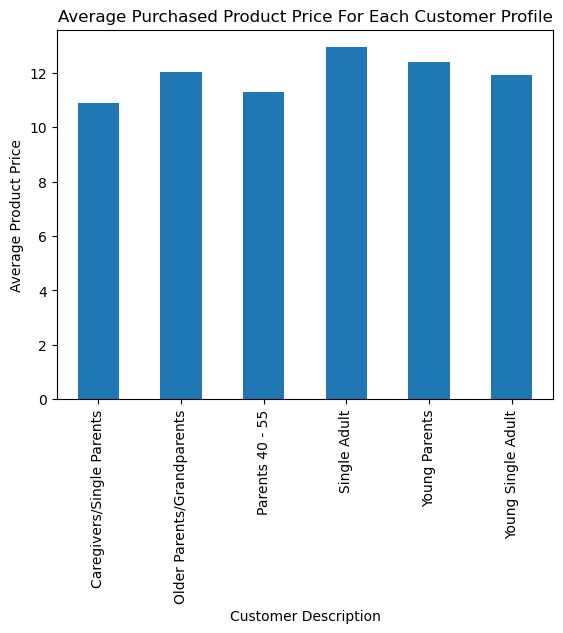

In [22]:
avg_price_profile_bar = avg_price_by_profile.plot(kind='bar', title='Average Purchased Product Price For Each Customer Profile', ylabel='Average Product Price', xlabel='Customer Description', legend=False)

According to the graph above, Caregivers/Single Parents spend the least and parents 40-55 spend the second least per product, while single adults over 39 and young parents under 40 spend the most per product. 

*** The output above is displying data before the strangely high prices were taken out. 

<AxesSubplot:xlabel='profile', ylabel='Count'>

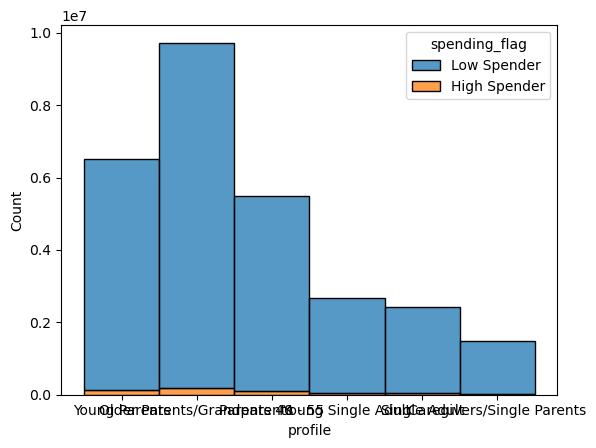

In [23]:
sns.histplot(
    data=df_high_activity_customers,
    x='profile',
    hue='spending_flag', 
    multiple='stack')

[None, None, None, None, None, None, None, None, None, None, None, None]

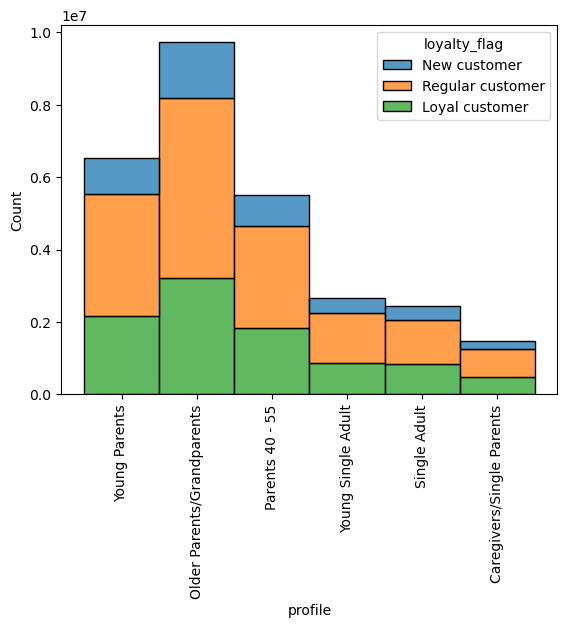

In [24]:
profile_spending_flag_bar = sns.histplot(
    data=df_high_activity_customers,
    x='profile',
    hue='loyalty_flag', 
    multiple='stack')
plt.setp(profile_spending_flag_bar.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None, None, None, None]

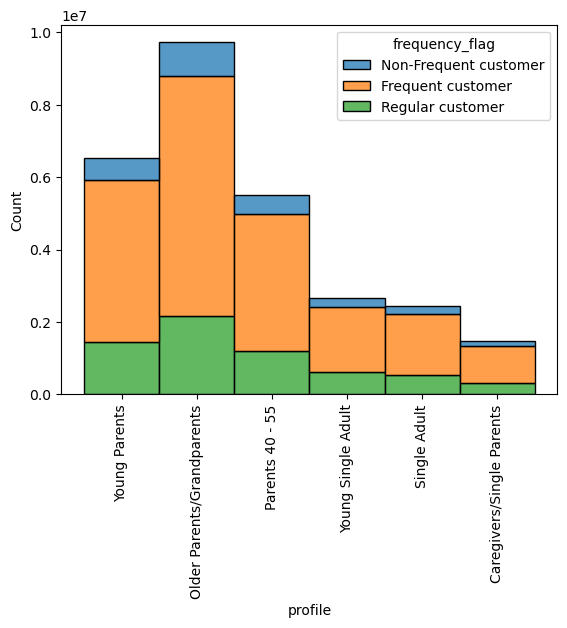

In [25]:
profile_spending_flag_bar = sns.histplot(
    data=df_high_activity_customers,
    x='profile',
    hue='frequency_flag', 
    multiple='stack')
plt.setp(profile_spending_flag_bar.get_xticklabels(), rotation=90)

In [36]:
df_high_activity_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_users_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_purchase_price', 'spending_flag', 'median_days_between_orders',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependants', 'Marital_Status', 'income',
       'Region', 'exclusion_flag', 'profile', 'generation_flag'],
      dtype='object')

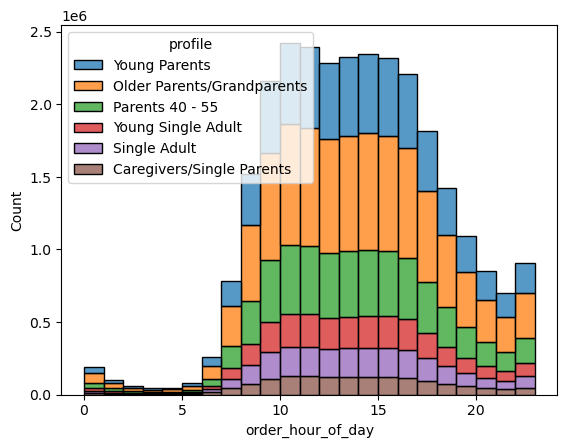

In [28]:
profile_spending_flag_bar = sns.histplot(
    data=df_high_activity_customers,
    x='order_hour_of_day',
    hue='profile', 
    multiple='stack',
    binwidth=1)
#plt.setp(profile_spending_flag_bar.get_xticklabels(), rotation=90)

In [29]:
avg_income_by_profile = df_high_activity_customers.groupby('profile').agg({'income': ['mean']})

In [30]:
avg_income_by_profile

,income
,mean
profile,
Caregivers/Single Parents,70870.404339
Older Parents/Grandparents,115891.203581
Parents 40 - 55,112883.123465
Single Adult,114585.455582
Young Parents,70654.835999
Young Single Adult,70479.434287


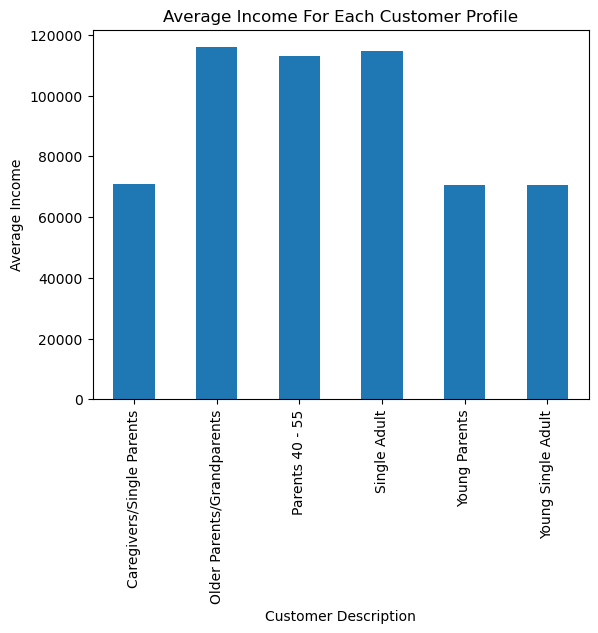

In [31]:
avg_income_profile_bar = avg_income_by_profile.plot(kind='bar', title='Average Income For Each Customer Profile', ylabel='Average Income', xlabel='Customer Description', legend=False)

There is a clear divide in the income based on customer profile. On average, parents/grandparents over 40 and single adults over 40 make over 100,000 usd.  The young parents, young single adults, caregivers and single parents on average make less than 80,000 usd. 
I want to make a few graphs real quick to see if the difference in income is more of an age issue, or a marital status issue. 

In [37]:
avg_income_by_generation = df_high_activity_customers.groupby('generation_flag').agg({'income': ['mean']})

In [39]:
avg_income_by_generation

,income
,mean
generation_flag,
Baby Boomer,115969.217554
Gen X,115931.896912
Gen Z,70794.148845
Millennial,79183.195562
Silent Gen,115674.948198


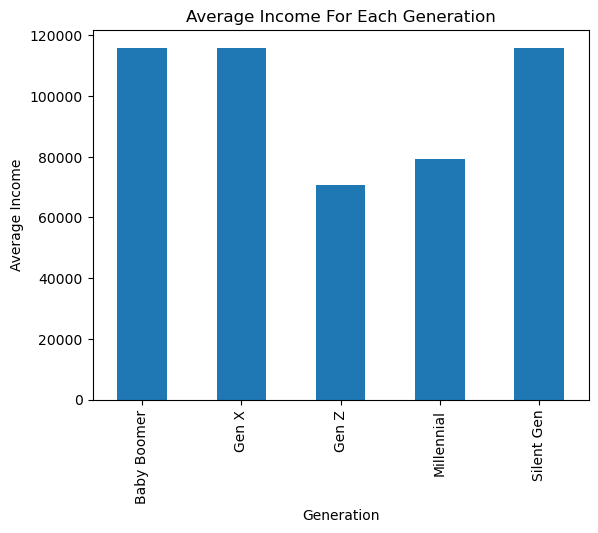

In [38]:
avg_income_generation_bar = avg_income_by_generation.plot(kind='bar', title='Average Income For Each Generation', ylabel='Average Income', xlabel='Generation', legend=False)

From this graph, we can see a big difference in average income depending on the customers' age. Baby Boomers, Gen X, and Silent Gen - or everyone born before 1980 - all make over 100,000 usd in average income. Millenials and Gen Z make less than 80,000 usd on average. There are a couple different ways to interpret this. Either older people are all making signigicantly more money than young people, or older people are less likely to spend more money using instacart to buy groceries when their income is less than 100,000 usd.  

In [40]:
avg_income_by_m_status = df_high_activity_customers.groupby('Marital_Status').agg({'income': ['mean']})

In [41]:
avg_income_by_m_status

,income
,mean
Marital_Status,
divorced/widowed,115969.768975
living with parents and siblings,70870.404339
married,101559.437850
single,91550.918195


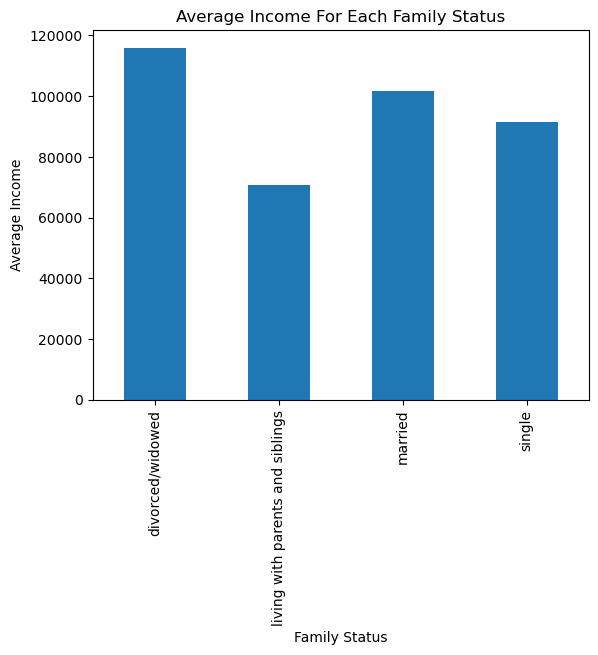

In [42]:
avg_income_m_status_bar = avg_income_by_m_status.plot(kind='bar', title='Average Income For Each Family Status', ylabel='Average Income', xlabel='Family Status', legend=False)

Divorced/Widowed people make the most income on average, and people that are living with parents and siblings make the least. 

In [ ]:
profile_department_bar = sns.histplot(
    data=df_high_activity_customers,
    x='department_name',
    hue='profile', 
    multiple='stack',
    binwidth=1)
plt.setp(profile_department_bar.get_xticklabels(), rotation=90)

The cell above is a graph showing the department names each profile group shops at. I went down to part 6 to make the department_name column before running this code. There isn't a note-worthy trend in this graph, so I cleared this cell's output.  

In [51]:
frequency_by_profile = df_high_activity_customers.groupby('profile').agg({'days_since_users_last_order': ['mean']})

In [52]:
frequency_by_profile

,days_since_users_last_order
,mean
profile,
Caregivers/Single Parents,10.750995
Older Parents/Grandparents,10.847336
Parents 40 - 55,10.810446
Single Adult,10.723006
Young Parents,10.790247
Young Single Adult,10.896484


(10.5, 11.0)

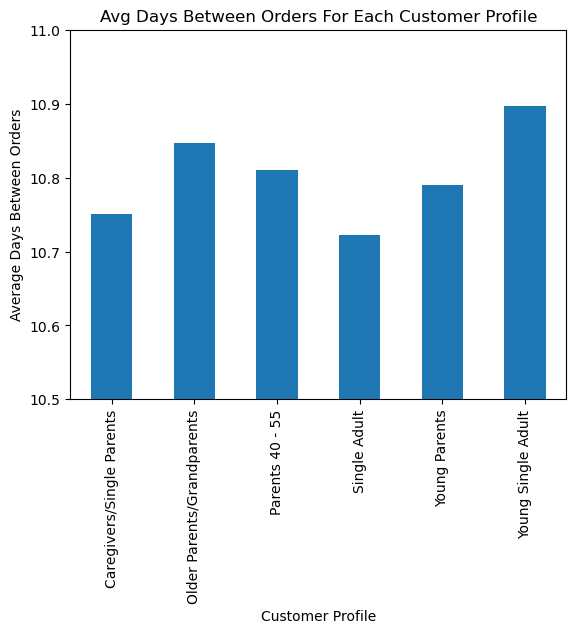

In [54]:
profile_frequency_bar = frequency_by_profile.plot(kind='bar', title='Avg Days Between Orders For Each Customer Profile', ylabel='Average Days Between Orders', xlabel='Customer Profile', legend=False)
profile_frequency_bar.set_ylim(10.5, 11)

On average, single adults over 40 and caregivers/single parents use Instacart most frequently, while young single adults under 40 use it the least frequently. 

In [30]:
avg_product_prices_by_profile = df_high_activity_customers.groupby('profile').agg({'prices': ['mean']})

In [31]:
avg_product_prices_by_profile

,prices
,mean
profile,
Caregivers/Single Parents,7.800604
Older Parents/Grandparents,7.793985
Parents 40 - 55,7.791653
Single Adult,7.788593
Young Parents,7.783595
Young Single Adult,7.779027


(7.75, 7.82)

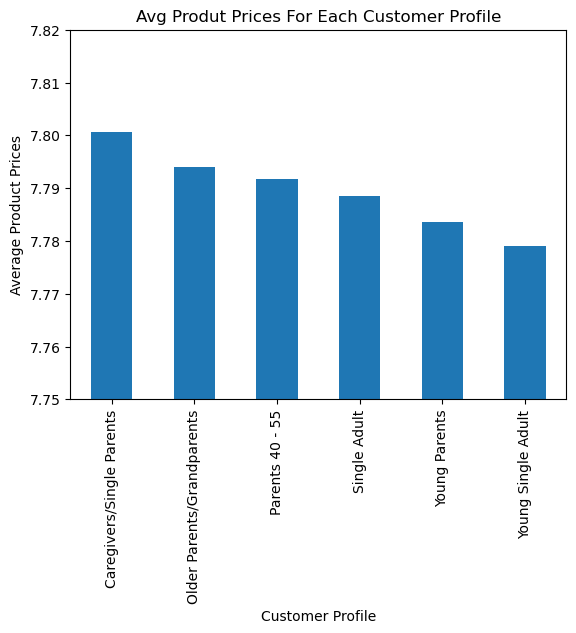

In [34]:
profile_prices_bar = avg_product_prices_by_profile.plot(kind='bar', title='Avg Produt Prices For Each Customer Profile', ylabel='Average Product Prices', xlabel='Customer Profile', legend=False)
profile_prices_bar.set_ylim(7.75, 7.82)

Surprisingly, despite having a lower average income, caregivers/single parents spend the most per purchased product. Not too surprisingly, young single adults spend the least per purchased product. 

# 6.) Department Names Column

### Adding Department Names

I don't like just seeing the department id number instead of the department names in these graphs. I think it's not very clear. I want to find a memory-efficient way to get department names in the graphs instead of the id numbers. My first idea is to bring in the departments dataframe and turn it into a data dictionary. Then, I'm hoping I can use the get() function to put the names on the graph. Unfortunately, I run into a brick wall with that method. So, I go with idea number two and just make an extra column on these large dataframes with the department name in them.  

In [38]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

#### The final function I used to add a departments name column to a dataframe. 
It's long and looks messy. Hopefully I can find a more efficient way to do this in the future.

In [37]:
# adds department names to list. 
#Don't forget to check dataframe name
depts = []

for ids in df_high_activity_customers['department_id']: 
    if ids == 1:
        depts.append('Frozen')
    elif ids == 2:
        depts.append('Other')
    elif ids == 3:
        depts.append('Bakery')
    elif ids == 4:
        depts.append('Produce')
    elif ids == 5:
        depts.append('Alcohol')
    elif ids == 6:
        depts.append('International')
    elif ids == 7:
        depts.append('Beverages')
    elif ids == 8:
        depts.append('Pets')
    elif ids == 9:
        depts.append('Dry Goods Pasta')
    elif ids == 10:
        depts.append('Bulk')
    elif ids == 11:
        depts.append('Personal Care')
    elif ids == 12:
        depts.append('Meat Seafood')
    elif ids == 13:
        depts.append('Pantry')
    elif ids == 14:
        depts.append('Breakfast')
    elif ids == 15:
        depts.append('Canned Goods')
    elif ids == 16:
        depts.append('Dairy Eggs')
    elif ids == 17:
        depts.append('Household')
    elif ids == 18:
        depts.append('Babies')
    elif ids == 19:
        depts.append('Snacks')
    elif ids == 20:
        depts.append('Deli')
    elif ids == 21:
        depts.append('Missing')
    else: 
        depts.append('Unknown')

In [38]:
df_high_activity_customers.shape

(30964564, 36)

In [39]:
df_high_activity_customers['department_name'] = depts

In [40]:
df_high_activity_customers.shape

(30964564, 37)

In [29]:
#plot_opc = sns.histplot(data=df_opc_merge,x='department_name',hue='loyalty_flag',multiple='stack', binwidth=1)
#plt.setp(plot_opc.get_xticklabels(), rotation=90)

### Adding department names to all the graphs

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

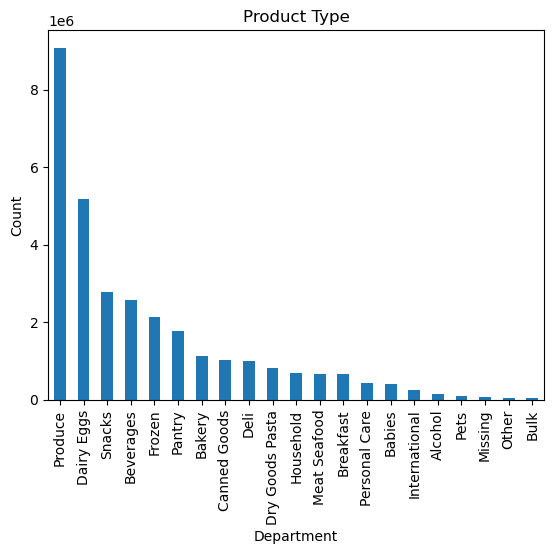

In [11]:
department_id_count_bar = df_high_activity_customers['department_name'].value_counts().plot.bar(xlabel='Department', ylabel='Count', title='Product Type')
plt.setp(department_id_count_bar.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

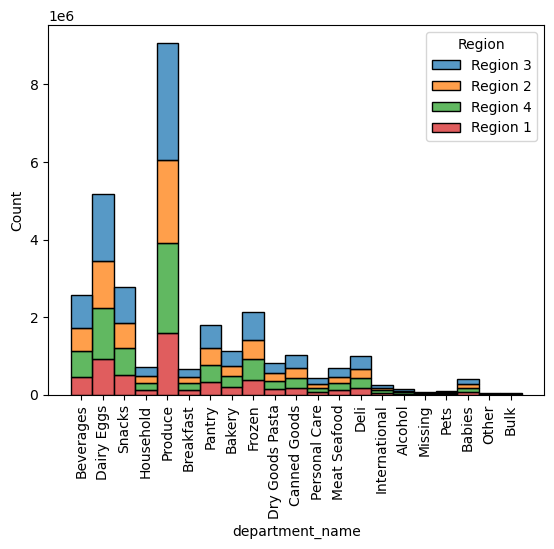

In [13]:
region_dept_bar = sns.histplot(data=df_high_activity_customers,x='department_name',hue='Region',multiple='stack', binwidth=1)
plt.setp(region_dept_bar.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

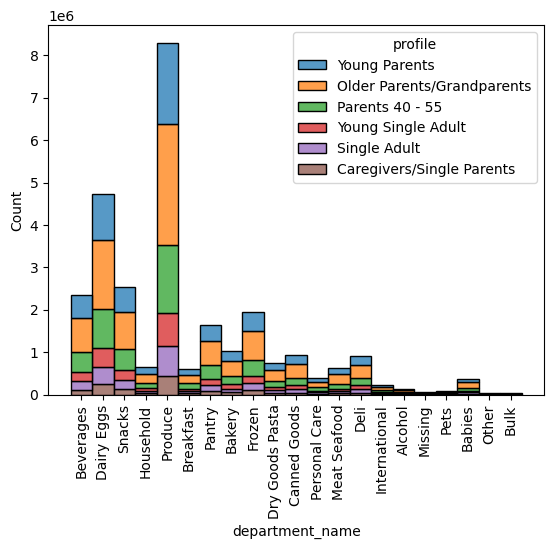

In [42]:
dept_profile_bar = sns.histplot(data=df_high_activity_customers,x='department_name',hue='profile',multiple='stack', binwidth=1)
plt.setp(dept_profile_bar.get_xticklabels(), rotation=90)